<a href="https://colab.research.google.com/github/gaurav3210/MLNow-/blob/main/3_1Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/ML.now()/02_EDA/student'

/content/drive/MyDrive/ML.now()/02_EDA/student


In [4]:
ls

cleanedMathData.csv  student-mat.gsheet  student-por.csv
student-mat.csv      student-merge.R     student.txt


In [5]:
import os

In [6]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [7]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [8]:
mathData.head(10) 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [9]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [10]:
uniMathData.to_csv('univariate_MathData_1.csv')

In [11]:
ls

cleanedMathData.csv  student-merge.R  univariate_MathData_1.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


## Data visualization

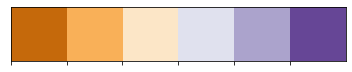

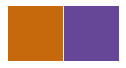

In [12]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [13]:
uniMathData.columns 

Index(['G1', 'G3'], dtype='object')

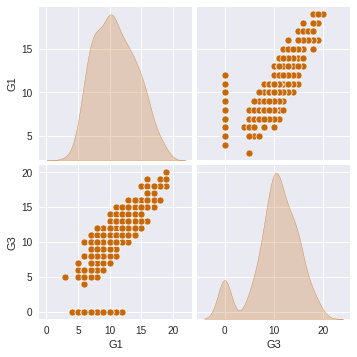

In [14]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [15]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [16]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [17]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [18]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [19]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [20]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [21]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [22]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 20ms/step - loss: 7.0169 - mae: 7.0169 - mse: 55.9591 - val_loss: 7.1837 - val_mae: 7.1837 - val_mse: 58.0492
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 6.9164 - mae: 6.9164 - mse: 54.3009 - val_loss: 7.0744 - val_mae: 7.0744 - val_mse: 56.2211
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 6.8168 - mae: 6.8168 - mse: 52.6876 - val_loss: 6.9647 - val_mae: 6.9647 - val_mse: 54.4176
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 6.7163 - mae: 6.7163 - mse: 51.0685 - val_loss: 6.8553 - val_mae: 6.8553 - val_mse: 52.6522
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 6.6156 - mae: 6.6156 - mse: 49.4950 - val_loss: 6.7461 - val_mae: 6.7461 - val_mse: 50.9232
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 6.5156 - mae: 6.5156 - mse: 47.9477 - val_loss: 6.6364 - val_mae: 6.6364 - val_mse: 49.2185
Epoch 7/3

In [23]:
print(history)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


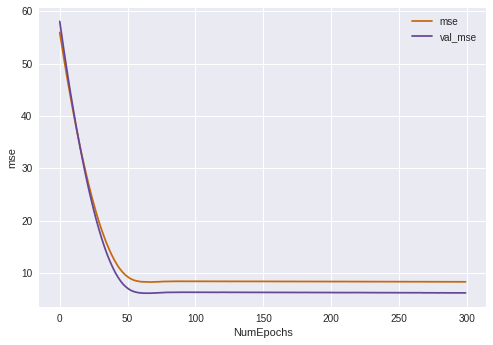

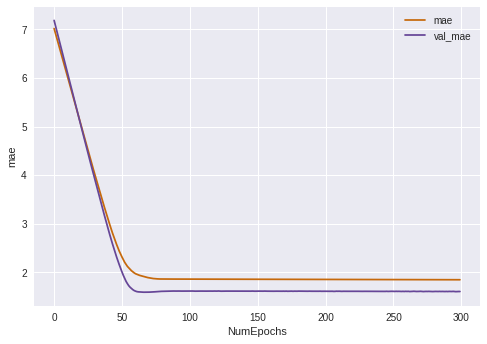

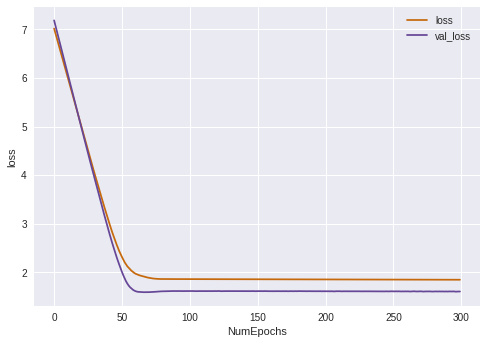

In [25]:

def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [27]:
model.predict([1])  #in the form of list

array([[1.2667601]], dtype=float32)

In [29]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''
input List = {tempListforPreds}
List of Predictions:
{model.predict(tempListforPreds)}
List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.2667601]]

input List = [1, 2, 3, 4, 5]
List of Predictions:
[[1.2667601]
 [2.242404 ]
 [3.218048 ]
 [4.193692 ]
 [5.169336 ]]
List of Predictions (flattened out):
[1.2667601 2.242404  3.218048  4.193692  5.169336 ]



In [30]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [31]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [32]:
print(len(testPreds))
print(testPreds)

79
[13.95013    6.14498   11.023199  16.877064  16.877064  11.998844
 13.95013   18.828352  18.828352   8.096268  13.95013   12.974487
  8.096268   7.1206236  9.071911  12.974487  11.023199  15.901419
  7.1206236 10.047556  14.925776  12.974487  13.95013   15.901419
  7.1206236  7.1206236  8.096268  10.047556  11.998844  10.047556
 11.998844  12.974487  10.047556   6.14498    9.071911  11.998844
  7.1206236  8.096268  13.95013    9.071911   9.071911   7.1206236
 11.998844   6.14498   12.974487   7.1206236  7.1206236 11.023199
 12.974487  16.877064  11.998844  14.925776   9.071911  11.998844
 14.925776  11.998844  14.925776  11.998844  14.925776  11.023199
 11.998844   8.096268  15.901419   7.1206236 15.901419  11.023199
 15.901419  12.974487   8.096268   8.096268  11.998844  17.852707
 12.974487  15.901419  10.047556   7.1206236 10.047556   7.1206236
 11.023199 ]


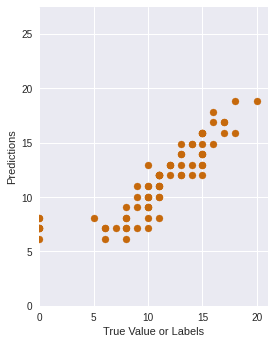

In [33]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

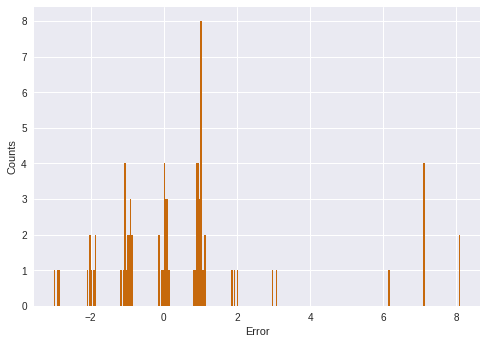

In [34]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions